## Open Cap Athlete Running Performance Analysis

In [1]:
'''
Format being used : 

{
    PathFileType : "",
    DataRate : "",
    CameraRate : "",
    .....
    Frame : [],
    Time : [],
    Neck : {
            x : [],
            y : [],
            z : []
    },
    RShoulder : {
        x : [],
        y : [],
        z : []
    },
    RElbow : {
        x : [],
        y : [],
        z : []
    }
}
'''

'\nFormat being used : \n\n{\n    PathFileType : "",\n    DataRate : "",\n    CameraRate : "",\n    .....\n    Frame : [],\n    Time : [],\n    Neck : {\n            x : [],\n            y : [],\n            z : []\n    },\n    RShoulder : {\n        x : [],\n        y : [],\n        z : []\n    },\n    RElbow : {\n        x : [],\n        y : [],\n        z : []\n    }\n}\n'

In [2]:
def readMarkerData(file_path):
    data = ""
    pathFile = ""
    ex_title_list = []
    ex_data_list = []
    titles = []

    data = []
    with open(file_path) as file:
        count = 0
        for line in file:
            if(count==0):
                l = line.split(" ")
#                 print(l)
                pathFile = l[3]
            elif(count == 1):
                l = line.split("\t")
                ex_title_list = l
            elif(count == 2):
                l = line.split("\t")
                ex_data_list = l
            elif(count == 3):
                l = line.split("\t")
                # Remove spaces from each element using list comprehension
                l = [item for item in l if item != ""]
                titles = l
                # Print the result
#                 print(l)

            elif (count == 4 or count == 5):
                pass

            else:
                l = line.split("\t")
                data.append(l)


            count+=1
#     print(data)
    
    
    last_string = ex_title_list[-1].rstrip('\n')
    ex_title_list[-1] = last_string

    last_string = ex_data_list[-1].rstrip('\n')
    ex_data_list[-1] = last_string
    
    dataDict = {}
    
    dataDict['PathFileType'] = pathFile
    
    
    # dataDict

    # For Data rate, Camera Rate etc
    for i in range(len(ex_title_list)):
        dataDict[ex_title_list[i]] = ex_data_list[i]

    datas = {}

    a = 2
    for i in range(len(data)):
        for j in range(len(data[i])):
            try:
                datas[str(j)].append(data[i][j])
            except:
                datas[str(j)] = [data[i][j]]

#     print(datas)
    # datas['3']
    # For the Titles
    count = 0
    for i in range(len(titles)):
        if(i < 2):
            dataDict[titles[i]] = datas[str(count)]
            count=count+1
        else:
            try:
                dataDict[titles[i]] = {}
                dataDict[titles[i]]['X'] = datas[str(count)]
                dataDict[titles[i]]['Y'] = datas[str(count+1)]
                dataDict[titles[i]]['Z'] = datas[str(count+2)]
                count=count+3
            except:
                pass
    return dataDict

In [3]:
markerData = readMarkerData("C:/Users/Jatin/Desktop/Engineering/ROBOTICS PROGRAM NUS/PROJECT/OpenCAP/DATA/NUS_PROJECT_DATA/MarkerData/Jogging_Start.trc")

In [4]:
markerData

{'PathFileType': '/workspace/Data/6dd8842f-6dd1-47d4-a9a5-5e84619526cd/MarkerData/PostAugmentation\n',
 'DataRate': '60.0',
 'CameraRate': '60.0',
 'NumFrames': '601',
 'NumMarkers': '63',
 'Units': 'm',
 'OrigDataRate': '60.0',
 'OrigDataStartFrame': '1',
 'OrigNumFrames': '601',
 'Frame#': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90

In [15]:
X = []
Y = []
Z = []
Labels = []

flag = 0
for key, value in markerData.items():
    if(key == "Time"):
        flag = 1
        continue
    if(flag == 1):
        try:
            if(key == "Neck" or key == "RShoulder" or key == "RElbow" or key == "RWrist" or key == "LShoulder" or key == "LElbow" or key == "LWrist" or key == "midHip" or key == "RHip" or key == "RKnee" or key == "RAnkle" or key == "LHip" or key == "LKnee" or key == "LAnkle" or key == "LBigToe" or key == "LSmallToe" or key == "LHeel" or key == "RBigToe" or key == "RSmallToe" or key == "RHeel"):
                x = value['X'][200]
                y = value['Y'][200]
                z = value['Z'][200]
                labels = key


                X.append(float(x))
                Y.append(float(y))
                Z.append(float(z))
                Labels.append(labels)
        except:
            pass
        

In [16]:
X, Y, Z, Labels

([0.44421,
  0.46677,
  0.57552,
  0.71104,
  0.43766,
  0.33851,
  0.54891,
  0.56314,
  0.55734,
  0.66244,
  0.50892,
  0.57827,
  0.77507,
  0.53108,
  0.66744,
  0.6614,
  0.49558,
  0.6625,
  0.65463,
  0.46824],
 [1.447735,
  1.443865,
  1.151895,
  1.329235,
  1.452425,
  1.188475,
  1.140165,
  0.883645,
  0.882595,
  0.490365,
  0.064795,
  0.886885,
  0.560735,
  0.138195,
  0.065145,
  0.068215,
  0.112545,
  0.025725,
  0.025875,
  0.029235],
 [-0.01834,
  0.1532,
  0.22464,
  0.08707,
  -0.18977,
  -0.26238,
  -0.19016,
  -0.00241,
  0.11853,
  0.08335,
  0.04192,
  -0.12268,
  -0.15089,
  -0.14729,
  -0.14801,
  -0.15136,
  -0.14887,
  0.0654,
  0.06696,
  0.03659],
 ['Neck',
  'RShoulder',
  'RElbow',
  'RWrist',
  'LShoulder',
  'LElbow',
  'LWrist',
  'midHip',
  'RHip',
  'RKnee',
  'RAnkle',
  'LHip',
  'LKnee',
  'LAnkle',
  'LBigToe',
  'LSmallToe',
  'LHeel',
  'RBigToe',
  'RSmallToe',
  'RHeel'])

### Defining Line Segments(Defining the Human Shape) : 


In [17]:
# Define pairs for lines
line_segments = [((Labels.index("Neck"), Labels.index("RShoulder"))), ((Labels.index("Neck"), Labels.index("LShoulder"))),((Labels.index("RShoulder"), Labels.index("RElbow"))),
                ((Labels.index("RElbow"), Labels.index("RWrist"))), ((Labels.index("LElbow"), Labels.index("LShoulder"))),((Labels.index("LElbow"), Labels.index("LWrist"))),
                ((Labels.index("Neck"), Labels.index("midHip"))), ((Labels.index("midHip"), Labels.index("RHip"))), ((Labels.index("midHip"), Labels.index("LHip"))), 
                ((Labels.index("LHip"), Labels.index("LKnee"))), ((Labels.index("LKnee"), Labels.index("LAnkle"))), ((Labels.index("LAnkle"), Labels.index("LHeel"))),
                ((Labels.index("LAnkle"), Labels.index("LSmallToe"))), ((Labels.index("LAnkle"), Labels.index("LBigToe"))), ((Labels.index("RHip"), Labels.index("RKnee"))),
                ((Labels.index("RKnee"), Labels.index("RAnkle"))),((Labels.index("RAnkle"), Labels.index("RHeel"))), ((Labels.index("RAnkle"), Labels.index("RBigToe"))),
                ((Labels.index("RAnkle"), Labels.index("RSmallToe")))]

In [13]:
import plotly.graph_objects as go
from IPython.display import display, clear_output
import numpy as np
import time

# Function to generate random data for the example
def generate_data():
    x = np.random.rand(5) * 10
    y = np.random.rand(5) * 10
    z = np.random.rand(5) * 10
    return x, y, z

# Create a figure
fig = go.FigureWidget(
    data=[go.Scatter3d(x=[0], y=[0], z=[0], mode='markers')],
    layout=go.Layout(scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis'))
)

# Display the initial plot
display(fig)

# Get the scatter trace
scatter = fig.data[0]

# Real-time updating loop
for _ in range(50):  # Adjust the number of iterations as needed
    time.sleep(1)  # Simulate some data generation delay
    
    # Generate new data
    x, y, z = generate_data()

    # Update the scatter trace data
    scatter.update(x=x, y=y, z=z)

    # Clear the output
    clear_output(wait=True)
    # Display the updated plot
    display(fig)


FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter3d',
              'uid': 'c43008c6-5092-4fc6-b649-b8047eb7df4b',
              'x': array([6.89020727, 7.20700797, 5.86702538, 8.3124249 , 4.15003759]),
              'y': array([1.05172412, 7.35523803, 6.02726094, 1.16779526, 2.91370244]),
              'z': array([1.48091407, 7.42262975, 0.34649878, 1.11017668, 0.5362902 ])}],
    'layout': {'scene': {'xaxis': {'title': {'text': 'X Axis'}},
                         'yaxis': {'title': {'text': 'Y Axis'}},
                         'zaxis': {'title': {'text': 'Z Axis'}}},
               'template': '...'}
})

In [18]:
import plotly.graph_objects as go

# Replace these with your actual XYZ coordinates and point labels
x_points = X
y_points = Y
z_points = Z
point_labels = Labels  # Add labels for each point

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_points,
    y=y_points,
    z=z_points,
    mode='markers',
    marker=dict(size=8, color='red'),
    text=point_labels,
    hoverinfo='text',  # Show only the text on hover
)])

# Scatter3d trace for lines
for segment in line_segments:
    x_segment = [x_points[i] for i in segment]
    y_segment = [y_points[i] for i in segment]
    z_segment = [z_points[i] for i in segment]

    line_trace = go.Scatter3d(
        x=x_segment,
        y=y_segment,
        z=z_segment,
        mode='lines',
        line=dict(color="Red", width=2),
    )

    fig.add_trace(line_trace)

# Set X-axis range
fig.update_layout(scene=dict(xaxis=dict(range=[0, 2])))


# Set axis labels
fig.update_layout(scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis'))

# Show the plot
fig.show()


In [7]:
def readKinematicsData(file_path):
    dataDict = {}
    titles = []
    data = []
    with open(file_path) as file:
        count = 0
        for line in file:
            if(count == 0 or count == 1 or count == 5 or count == 7 or count == 8 or count == 9):
                pass
            elif(count == 2 or count == 3 or count ==  4):
                l = line.split("=")
                dataDict[l[0]] = l[1]
            elif(count == 6):
                dataDict["Units"] = line
            elif(count == 10):
                l = line.split("\t")
                titles = l
            else:
                l = line.split("\t")
                data.append(l)

            count = count+1
    datas = {}
    for i in range(len(data)):
        for j in range(len(data[i])):
            try:
                datas[str(j)].append(data[i][j])
            except:
                datas[str(j)] = [data[i][j]]
    for i in range(len(titles)):
        dataDict[titles[i]] = datas[str(i)]
    
    return dataDict

## Running Performance Analysis  Initial 

In [270]:
data = readKinematicsData("C:/Users/Jatin/Desktop/Engineering/ROBOTICS PROGRAM NUS/PROJECT/OpenCAP/DATA/NUS_PROJECT_DATA/OpenSimData/Kinematics/Jogging_Start.mot")

In [217]:
data

{'nRows': '601\n',
 'nColumns': '36\n',
 'inDegrees': 'yes\n',
 'Units': 'Units are S.I. units (second, meters, Newtons, ...)\n',
 'time': ['      0.00000000',
  '      0.01666670',
  '      0.03333330',
  '      0.05000000',
  '      0.06666670',
  '      0.08333330',
  '      0.10000000',
  '      0.11666670',
  '      0.13333330',
  '      0.15000000',
  '      0.16666670',
  '      0.18333330',
  '      0.20000000',
  '      0.21666670',
  '      0.23333330',
  '      0.25000000',
  '      0.26666670',
  '      0.28333330',
  '      0.30000000',
  '      0.31666670',
  '      0.33333330',
  '      0.35000000',
  '      0.36666670',
  '      0.38333330',
  '      0.40000000',
  '      0.41666670',
  '      0.43333330',
  '      0.45000000',
  '      0.46666670',
  '      0.48333330',
  '      0.50000000',
  '      0.51666670',
  '      0.53333330',
  '      0.55000000',
  '      0.56666670',
  '      0.58333330',
  '      0.60000000',
  '      0.61666670',
  '      0.63333330',
  ' 

In [219]:
time1 = data["time"]
time1 = [float(i) for i in time1]
time1

[0.0,
 0.0166667,
 0.0333333,
 0.05,
 0.0666667,
 0.0833333,
 0.1,
 0.1166667,
 0.1333333,
 0.15,
 0.1666667,
 0.1833333,
 0.2,
 0.2166667,
 0.2333333,
 0.25,
 0.2666667,
 0.2833333,
 0.3,
 0.3166667,
 0.3333333,
 0.35,
 0.3666667,
 0.3833333,
 0.4,
 0.4166667,
 0.4333333,
 0.45,
 0.4666667,
 0.4833333,
 0.5,
 0.5166667,
 0.5333333,
 0.55,
 0.5666667,
 0.5833333,
 0.6,
 0.6166667,
 0.6333333,
 0.65,
 0.6666667,
 0.6833333,
 0.7,
 0.7166667,
 0.7333333,
 0.75,
 0.7666667,
 0.7833333,
 0.8,
 0.8166667,
 0.8333333,
 0.85,
 0.8666667,
 0.8833333,
 0.9,
 0.9166667,
 0.9333333,
 0.95,
 0.9666667,
 0.9833333,
 1.0,
 1.0166667,
 1.0333333,
 1.05,
 1.0666667,
 1.0833333,
 1.1,
 1.1166667,
 1.1333333,
 1.15,
 1.1666667,
 1.1833333,
 1.2,
 1.2166667,
 1.2333333,
 1.25,
 1.2666667,
 1.2833333,
 1.3,
 1.3166667,
 1.3333333,
 1.35,
 1.3666667,
 1.3833333,
 1.4,
 1.4166667,
 1.4333333,
 1.45,
 1.4666667,
 1.4833333,
 1.5,
 1.5166667,
 1.5333333,
 1.55,
 1.5666667,
 1.5833333,
 1.6,
 1.6166667,
 1.633

#### Arm Rotation Left

In [235]:
arm_rot_l_1 = data["arm_rot_l"]
arm_rot_l_1 = [float(i) for i in arm_rot_l_1]
arm_rot_l_1

[17.64481171,
 17.03808198,
 16.92336657,
 16.66385448,
 16.85864819,
 17.1994705,
 17.36304766,
 18.34505466,
 19.38675106,
 19.76397587,
 20.98371257,
 21.33353807,
 21.70644553,
 21.94739,
 21.64170363,
 22.23603993,
 22.23576572,
 22.31125636,
 22.31121645,
 22.32832679,
 22.81850873,
 22.81713251,
 22.81031981,
 22.80835924,
 22.84949166,
 22.8558347,
 22.85621921,
 22.95495112,
 22.81969256,
 22.92204325,
 22.02867561,
 22.00274983,
 21.3296826,
 19.73651483,
 18.90642551,
 18.38476729,
 17.89291466,
 16.91446914,
 13.91649327,
 13.24565177,
 12.61277377,
 11.51145301,
 10.84293115,
 10.28102719,
 9.88413009,
 10.41438362,
 10.7633406,
 11.813944,
 12.24811697,
 13.88814048,
 13.64167345,
 13.7031685,
 13.54683187,
 13.34337094,
 13.10723137,
 12.39788841,
 12.32322192,
 12.11917123,
 11.31401226,
 11.24591999,
 11.14447416,
 11.09483108,
 11.1459417,
 11.12438497,
 10.28190542,
 10.86589184,
 11.32025209,
 11.130152,
 11.12396108,
 10.83985028,
 10.6339683,
 10.24677786,
 9.9329

Text(0.5, 1.0, 'Person 1, Arm Rotation L(Not the Optimum Performance)')

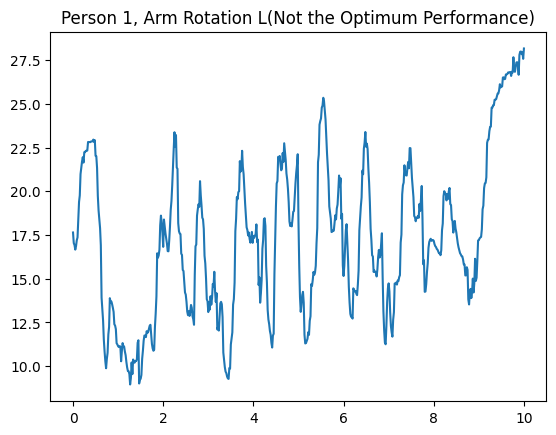

In [232]:
import matplotlib.pyplot as plt

plt.plot(time1, arm_rot_l_1)
plt.title("Person 1, Arm Rotation L(Not the Optimum Performance)")

#### Arm Rotation Right

In [233]:
arm_rot_r_1 = data["arm_rot_r"]
arm_rot_r_1 = [float(i) for i in arm_rot_r_1]
arm_rot_r_1

[21.44531314,
 19.27434396,
 11.33908567,
 10.29546881,
 9.97594739,
 10.53308703,
 11.09524979,
 13.52948907,
 15.53296686,
 16.43950999,
 17.98990631,
 18.83043108,
 19.30931685,
 19.11062675,
 19.04039244,
 17.90971264,
 17.90909081,
 17.85057861,
 17.8501854,
 17.86290797,
 17.97120949,
 17.97380417,
 17.97226113,
 17.98342169,
 17.91456291,
 17.91558988,
 17.9159582,
 18.04444519,
 18.08659167,
 20.0541058,
 19.97305655,
 21.06729178,
 20.65358062,
 19.67405623,
 19.79314914,
 21.04997467,
 21.04084541,
 21.4738124,
 21.14146573,
 21.39204297,
 21.48082228,
 21.46729859,
 21.44177924,
 21.39132948,
 21.39961256,
 20.60263144,
 21.33938591,
 20.94553598,
 21.77895942,
 21.14298261,
 21.30766184,
 21.22542891,
 20.61941913,
 19.86101104,
 18.83986038,
 18.00012356,
 17.25846129,
 16.40732208,
 15.86334581,
 15.09558401,
 14.4985836,
 13.97002987,
 13.69735114,
 13.54104277,
 13.77320529,
 13.44046093,
 12.35493413,
 12.13442499,
 11.4839402,
 10.80098686,
 8.53794571,
 7.50151962,
 

#### Arm Rotation Left

In [ ]:
arm_rot_l_2 = data["arm_rot_l"]
arm_rot_l_2 = [float(i) for i in arm_rot_l_2]
arm_rot_l_2

Text(0.5, 1.0, 'Person 1, Arm Rotation R(Not the Optimum Performance)')

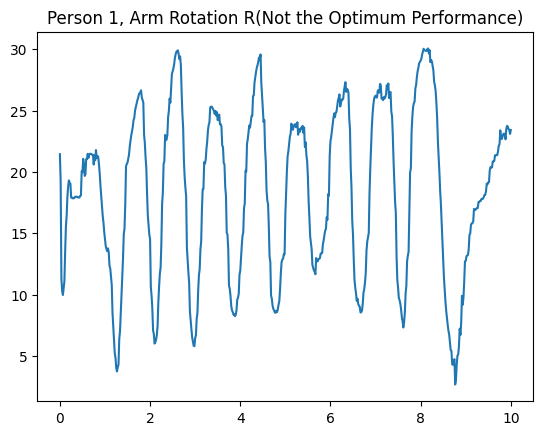

In [234]:
import matplotlib.pyplot as plt

plt.plot(time1, arm_rot_r_1)
plt.title("Person 1, Arm Rotation R(Not the Optimum Performance)")

#### Arm Flex Right

In [220]:
arm_flex_r_1 = data["arm_flex_r"]
arm_flex_r_1 = [float(i) for i in arm_flex_r_1]
arm_flex_r_1

[5.55731218,
 3.81916892,
 2.03689577,
 1.64546507,
 1.27365272,
 1.12976526,
 1.25431734,
 1.65245705,
 2.00263293,
 2.24550883,
 2.50034307,
 2.58896332,
 2.71550968,
 2.93060176,
 2.79911906,
 2.73534006,
 2.73322273,
 2.80695531,
 2.80538942,
 2.85480893,
 2.79146149,
 2.74924656,
 2.85325354,
 2.83646012,
 2.9328433,
 3.03440464,
 3.03809025,
 3.26947361,
 3.21608367,
 3.45094218,
 3.43335538,
 3.56991713,
 3.35491474,
 3.42969772,
 3.28145546,
 3.3884698,
 3.23362827,
 2.93040592,
 2.65103811,
 2.1578768,
 1.67864727,
 1.09933518,
 0.51661778,
 -0.017436,
 -0.16871605,
 -1.14258796,
 -0.94709758,
 -1.28638388,
 -0.84983782,
 -1.60093162,
 -1.75435508,
 -1.95552292,
 -2.53641665,
 -3.13839058,
 -3.93169351,
 -4.82507885,
 -5.82845263,
 -7.01732614,
 -8.07646843,
 -9.45831767,
 -10.74159621,
 -11.85700326,
 -13.128972,
 -14.66577916,
 -16.19890717,
 -18.35770555,
 -20.8106204,
 -22.66495298,
 -24.41673486,
 -26.25146203,
 -28.68218366,
 -30.77282905,
 -32.93447367,
 -34.50846517,
 

Text(0.5, 1.0, 'Person 1, Arm Flexion R(Not the Optimum Performance)')

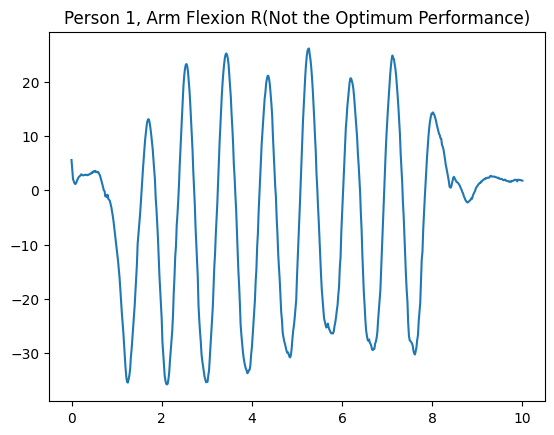

In [204]:
import matplotlib.pyplot as plt

plt.plot(time1, arm_flex_r_1)
plt.title("Person 1, Arm Flexion R(Not the Optimum Performance)")

#### Arm Flex Left

In [205]:
arm_flex_l_1 = data["arm_flex_l"]
arm_flex_l_1 = [float(i) for i in arm_flex_l_1]
arm_flex_l_1

[-0.28105768,
 -0.44088468,
 -0.13905224,
 -0.27419689,
 -0.21913251,
 -0.00118654,
 0.43324454,
 0.91919566,
 1.34667771,
 1.71921098,
 1.93716754,
 2.15522438,
 2.30901281,
 2.30858201,
 2.5041215,
 2.58711538,
 2.59069745,
 2.74084782,
 2.74156631,
 2.82500531,
 2.85815137,
 2.86637069,
 2.95017425,
 3.01174451,
 3.10330264,
 3.16699803,
 3.165717,
 3.33473972,
 3.20976306,
 3.16819179,
 3.04584545,
 2.75148414,
 2.23781613,
 1.86618438,
 1.34300174,
 0.74677753,
 -0.06763911,
 -0.99601521,
 -2.44038072,
 -3.53891969,
 -4.69839813,
 -5.94560663,
 -7.05225944,
 -7.92620286,
 -8.82924672,
 -9.04080374,
 -9.49299392,
 -9.60913418,
 -10.16472356,
 -10.14035863,
 -10.96539473,
 -11.78157586,
 -12.78047648,
 -13.78591376,
 -14.70642465,
 -15.89579817,
 -16.4454658,
 -17.09495708,
 -17.23948298,
 -16.71343668,
 -16.03264512,
 -15.12528127,
 -14.05823115,
 -12.73742031,
 -11.5109554,
 -9.21092045,
 -6.18999025,
 -3.58069163,
 -1.06204927,
 1.680726,
 4.23224259,
 6.30441447,
 8.53811202,
 1

Text(0.5, 1.0, 'Person 1, Arm Flexion L(Not the Optimum Performance)')

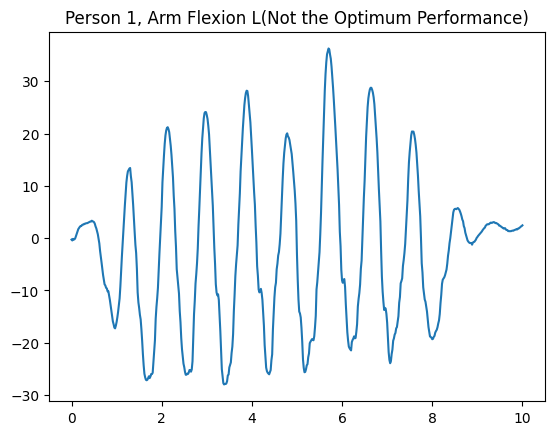

In [206]:
import matplotlib.pyplot as plt

plt.plot(time1, arm_flex_l_1)
plt.title("Person 1, Arm Flexion L(Not the Optimum Performance)")

##### Hip Flexion Data R

In [161]:
hip_flex_r_1 = data["hip_flexion_r"]
hip_flex_r_1 = [float(i) for i in hip_flex_r_1]

In [162]:
hip_flex_r_1

[-0.93242806,
 2.729645,
 3.34504928,
 2.96928466,
 2.56463618,
 2.04023946,
 1.63710386,
 1.35305285,
 1.0474697,
 0.73012817,
 0.37130949,
 0.03259583,
 -0.21222101,
 -0.44576968,
 -0.50437039,
 -0.80025224,
 -0.77712849,
 -1.18299926,
 -1.14884265,
 -1.33979963,
 -1.62251345,
 -1.65769365,
 -1.62736121,
 -1.69415929,
 -2.08502986,
 -2.04551177,
 -2.02894417,
 -2.23059839,
 -2.35576638,
 -2.33739941,
 -2.38925643,
 -2.44860977,
 -2.6480924,
 -2.32765341,
 -2.24379517,
 -1.94384308,
 -1.68144979,
 -1.28364714,
 -1.15795098,
 -0.85600638,
 -0.64588944,
 -0.65438451,
 -0.23240177,
 0.19623461,
 0.37635774,
 0.99555123,
 1.59387525,
 2.26810628,
 2.95327729,
 3.45461578,
 4.128332,
 4.72207702,
 5.22893748,
 5.77524053,
 6.26208599,
 6.61923032,
 7.07669733,
 7.99518334,
 8.96259292,
 10.59656281,
 11.99887004,
 13.39329812,
 14.92796845,
 16.20793362,
 17.32260007,
 18.17189717,
 18.73496503,
 19.35508508,
 19.50179976,
 19.44115805,
 18.54800583,
 17.20252028,
 16.38770035,
 15.0993775

Text(0.5, 1.0, 'Person 1, Hip Flexion R(Not the Optimum Performance)')

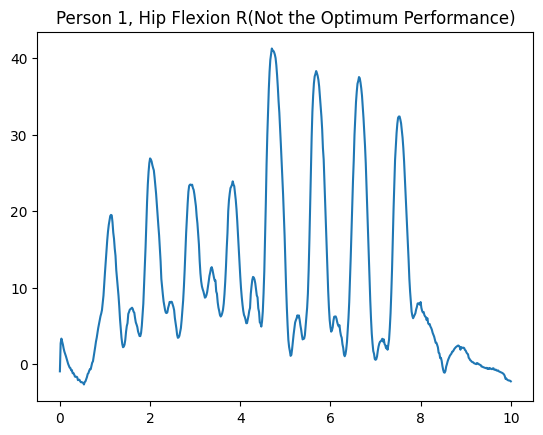

In [163]:
import matplotlib.pyplot as plt

plt.plot(time1, hip_flex_r_1)
plt.title("Person 1, Hip Flexion R(Not the Optimum Performance)")

#### Hip Flexion Data L 

In [164]:
hip_flex_l_1 = data["hip_flexion_l"]
hip_flex_l_1 = [float(i) for i in hip_flex_l_1]

In [165]:
hip_flex_l_1

[-2.36508086,
 1.30103519,
 2.52299514,
 2.29100994,
 2.02316192,
 1.6161794,
 1.25855759,
 1.06947131,
 0.80200581,
 0.51846717,
 0.16921035,
 -0.17461348,
 -0.46367598,
 -0.74031098,
 -0.88314264,
 -1.22205996,
 -1.26520171,
 -1.68992447,
 -1.71926919,
 -1.90049725,
 -2.23858166,
 -2.27945286,
 -2.21261642,
 -2.24674329,
 -2.65985693,
 -2.57712793,
 -2.54141664,
 -2.64206532,
 -2.70747577,
 -2.61818714,
 -2.55920655,
 -2.48255632,
 -2.59876257,
 -2.20812691,
 -2.0620796,
 -1.70984183,
 -1.42449516,
 -1.00166513,
 -0.80966025,
 -0.5820296,
 -0.4225177,
 -0.5838554,
 -0.26793994,
 -0.02996638,
 -0.03472197,
 0.31628194,
 0.66964997,
 1.02035162,
 1.31181595,
 1.44965225,
 1.77658619,
 2.00335618,
 2.04452886,
 1.9408796,
 1.6466736,
 1.40126668,
 1.13661485,
 0.94997606,
 0.58072838,
 0.78779933,
 0.75750506,
 0.60205999,
 0.75579628,
 0.87876615,
 1.02892909,
 1.11746969,
 1.06537279,
 1.35156214,
 1.57484449,
 1.72105374,
 1.2134312,
 0.36063301,
 -0.14576384,
 -0.79939824,
 -1.14828

Text(0.5, 1.0, 'Person 1, Hip Flexion L(Not the Optimum Performance)')

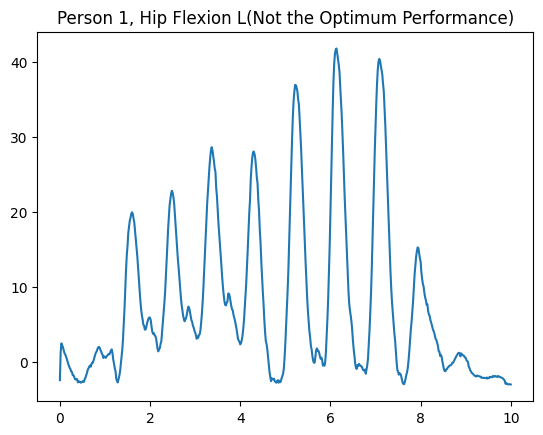

In [166]:
import matplotlib.pyplot as plt

plt.plot(time1, hip_flex_l_1)
plt.title("Person 1, Hip Flexion L(Not the Optimum Performance)")

#### Knee Angle R

In [167]:
knee_angle_r_1 = data["knee_angle_r"]
knee_angle_r_1 = [float(i) for i in knee_angle_r_1]
knee_angle_r_1

[4.42524709,
 3.92663111,
 2.72418824,
 1.88000861,
 1.35920025,
 1.08892335,
 0.93740801,
 0.84594395,
 0.75338023,
 0.70263138,
 0.66766726,
 0.64996589,
 0.61717609,
 0.60837834,
 0.59155936,
 0.56322459,
 0.56767092,
 0.52893309,
 0.5599434,
 0.49151251,
 0.48134684,
 0.47880845,
 0.48314804,
 0.48020902,
 0.47743135,
 0.4906502,
 0.56343701,
 0.54405007,
 0.59054109,
 0.68136303,
 0.78977821,
 0.96182781,
 1.17171672,
 1.58950939,
 2.07194576,
 2.70141197,
 3.43839601,
 4.35101708,
 5.44309044,
 6.58938599,
 7.73256272,
 8.99491591,
 10.43029213,
 11.83316611,
 13.21894536,
 14.8841097,
 16.71420553,
 18.73661641,
 20.90098946,
 22.83162284,
 24.92833765,
 26.97934203,
 29.04207977,
 31.23798191,
 33.65956602,
 36.00654967,
 38.4999376,
 41.15505559,
 44.4568992,
 47.92310516,
 51.10065394,
 53.90605664,
 56.51872773,
 59.0548599,
 60.82044179,
 62.14539665,
 63.0552148,
 63.94646388,
 63.88540938,
 63.37847367,
 62.00151743,
 60.08601058,
 58.6248236,
 56.39383681,
 53.87513689,


Text(0.5, 1.0, 'Person 1, Knee Angle R(Not the Optimum Performance)')

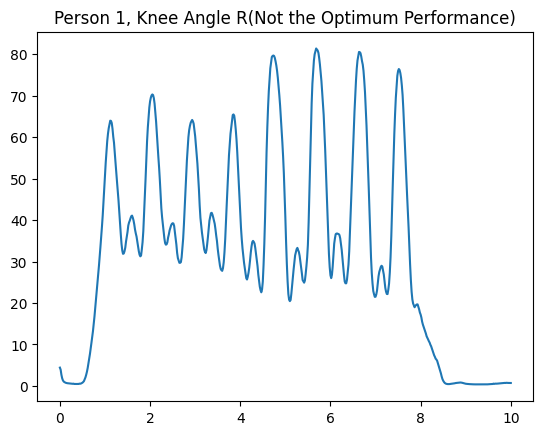

In [168]:
import matplotlib.pyplot as plt

plt.plot(time1, knee_angle_r_1)
plt.title("Person 1, Knee Angle R(Not the Optimum Performance)")

#### Knee Angle L

In [169]:
knee_angle_l_1 = data["knee_angle_l"]
knee_angle_l_1 = [float(i) for i in knee_angle_l_1]
knee_angle_l_1

[5.2561681,
 4.3340762,
 4.08948849,
 3.38768086,
 3.04095604,
 2.88141069,
 2.67632526,
 2.58509367,
 2.45080255,
 2.39914261,
 2.32405836,
 2.29686108,
 2.18440144,
 2.10298822,
 2.08504359,
 2.08407843,
 2.09428371,
 2.0747533,
 2.08029927,
 2.00908572,
 1.96300884,
 1.98257698,
 1.92475579,
 1.8975493,
 1.81009691,
 1.79206079,
 1.78553212,
 1.92084773,
 2.04864433,
 2.29133971,
 2.70678917,
 3.23522504,
 3.71634275,
 4.45328714,
 5.14016485,
 6.02492711,
 6.93891823,
 8.02624439,
 9.14097721,
 10.16830139,
 11.19164492,
 12.24422201,
 13.62011906,
 14.71250745,
 15.74948672,
 16.94403924,
 18.21489733,
 19.57165617,
 20.92131392,
 22.05428359,
 23.42956231,
 24.65924148,
 25.75977554,
 26.7570214,
 27.67276949,
 28.86182253,
 29.94541514,
 30.83635432,
 31.85894256,
 33.10054568,
 34.1351897,
 34.72641502,
 35.36412958,
 36.28491384,
 36.736305,
 37.12231123,
 37.32978297,
 37.72834494,
 37.78030098,
 37.5509499,
 36.36179779,
 34.7635054,
 33.53940754,
 32.14806713,
 30.91921315,

Text(0.5, 1.0, 'Person 1, Knee Angle L(Not the Optimum Performance)')

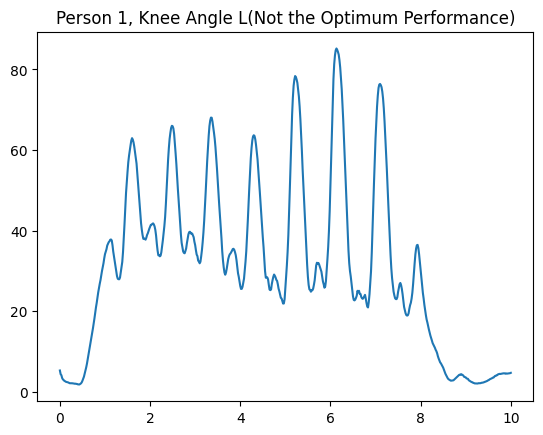

In [170]:
import matplotlib.pyplot as plt

plt.plot(time1, knee_angle_l_1)
plt.title("Person 1, Knee Angle L(Not the Optimum Performance)")

#### Ankle Angle L

In [171]:
ankle_angle_l_1 = data["ankle_angle_l"]
ankle_angle_l_1 = [float(i) for i in ankle_angle_l_1]
ankle_angle_l_1

[10.01561323,
 10.84132904,
 10.69976098,
 10.29027571,
 10.0160419,
 9.99644569,
 9.87434988,
 9.82437331,
 9.41984105,
 9.27595299,
 9.08355522,
 9.03827805,
 8.85280177,
 8.71772182,
 8.67641051,
 8.69312409,
 8.69174576,
 8.78149236,
 8.78120535,
 8.77305875,
 8.85521124,
 8.84898269,
 8.87518986,
 8.79391354,
 8.74199136,
 8.74518129,
 8.74420703,
 8.64989405,
 8.5899908,
 8.56438277,
 8.48127783,
 8.52442622,
 8.35372872,
 8.70270125,
 8.73826038,
 8.87014626,
 8.9947482,
 9.18176988,
 9.39968461,
 9.4794668,
 9.5833424,
 9.92788968,
 10.50681737,
 10.81086806,
 11.14658984,
 11.27775627,
 11.67803548,
 11.79049999,
 12.46753657,
 12.85342495,
 13.52998507,
 14.0862883,
 14.74591887,
 15.7099578,
 16.52506107,
 17.09666204,
 17.61951235,
 18.51633432,
 19.67083385,
 21.13097499,
 22.58768779,
 23.96842785,
 24.73849038,
 25.16931544,
 24.99143963,
 24.76175686,
 24.40073908,
 24.05193052,
 23.22462141,
 22.15216369,
 20.42171741,
 18.92813536,
 18.2545733,
 16.95940547,
 16.08269

Text(0.5, 1.0, 'Person 1, Ankle Angle L(Not the Optimum Performance)')

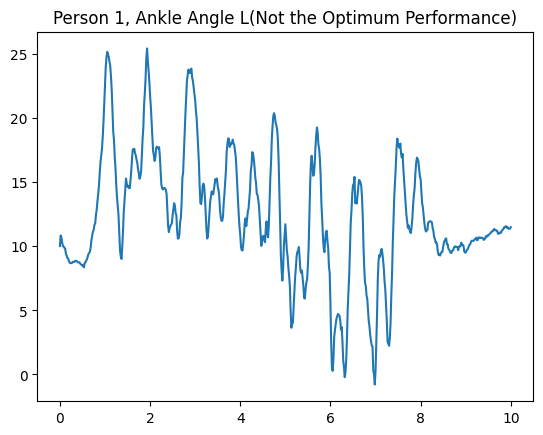

In [172]:
import matplotlib.pyplot as plt

plt.plot(time1, ankle_angle_l_1)
plt.title("Person 1, Ankle Angle L(Not the Optimum Performance)")

#### Ankle Angle L

In [173]:
ankle_angle_r_1 = data["ankle_angle_r"]
ankle_angle_r_1 = [float(i) for i in ankle_angle_r_1]
ankle_angle_r_1

[3.88413028,
 6.61726477,
 7.50974385,
 8.19756808,
 8.62931401,
 8.84877138,
 8.95941507,
 8.90408332,
 8.56039017,
 8.45602416,
 8.29987623,
 8.18590546,
 8.04461159,
 7.97418298,
 8.18112867,
 8.34005995,
 8.34044231,
 8.56641807,
 8.56859479,
 8.6005454,
 8.90512288,
 8.91864834,
 8.92526052,
 8.83436523,
 8.75170611,
 8.75260686,
 8.75297728,
 8.50496954,
 8.39568191,
 8.09090727,
 7.79276112,
 7.62051573,
 7.42469143,
 7.522958,
 7.59970107,
 7.40170543,
 7.43256103,
 7.41812179,
 7.40646675,
 7.31574967,
 7.29743093,
 7.52516739,
 7.75244966,
 7.73050985,
 7.92337978,
 7.41228296,
 7.62641933,
 7.40288453,
 7.77053134,
 7.64588614,
 8.21381826,
 8.64195386,
 9.02568053,
 9.80999767,
 10.48805638,
 11.38253405,
 11.80501168,
 12.64281437,
 13.30530045,
 13.68503036,
 13.85733071,
 13.89859918,
 13.90256131,
 14.01334503,
 13.86215525,
 13.98541043,
 14.35143513,
 14.53229728,
 14.61756259,
 14.36568645,
 14.20493712,
 13.98547656,
 14.39539887,
 14.36776967,
 14.3440622,
 13.9803

Text(0.5, 1.0, 'Person 1, Ankle Angle R(Not the Optimum Performance)')

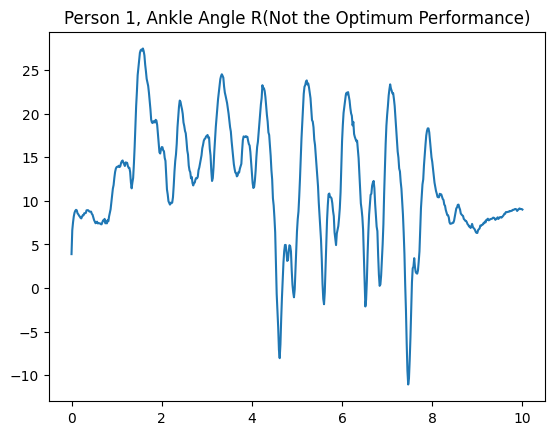

In [177]:
import matplotlib.pyplot as plt

plt.plot(time1, ankle_angle_r_1)
plt.title("Person 1, Ankle Angle R(Not the Optimum Performance)")

#### Lumbar Bending Analysis Initial

In [178]:
lumbar_bending_1 = data["lumbar_bending"]
lumbar_bending_1 = [float(i) for i in lumbar_bending_1]
lumbar_bending_1

[7.55227826,
 6.01237757,
 4.76805601,
 4.13016617,
 3.89205384,
 3.80948189,
 3.80432188,
 3.76751056,
 3.79802086,
 3.81445399,
 3.82018312,
 3.83733666,
 3.87629823,
 3.91986994,
 3.82166974,
 3.80431448,
 3.80461698,
 3.72617538,
 3.72867146,
 3.72758822,
 3.67431498,
 3.68308162,
 3.67203955,
 3.67384087,
 3.69960339,
 3.7296601,
 3.73287548,
 3.84337849,
 3.91684081,
 3.96143787,
 3.98495466,
 4.03211648,
 4.04388214,
 4.03664789,
 3.92584184,
 3.86344592,
 3.76990464,
 3.74828931,
 3.72370464,
 3.7154958,
 3.7026953,
 3.6424687,
 3.57668298,
 3.5306498,
 3.47493387,
 3.4448315,
 3.44566929,
 3.41229925,
 3.50200229,
 3.54773217,
 3.51328639,
 3.59190679,
 3.64355062,
 3.59827495,
 3.41306518,
 3.10984859,
 2.75312696,
 2.42595632,
 2.16606949,
 1.8112754,
 1.50775929,
 1.26751499,
 1.16182961,
 1.17118672,
 1.19648713,
 1.35488669,
 1.58070023,
 1.9021715,
 1.98461394,
 2.14245626,
 2.19862195,
 2.22226857,
 2.33635587,
 2.45020878,
 2.71215559,
 3.08047198,
 3.33290638,
 3.4306

Text(0.5, 1.0, 'Person 1, Lumbar Bending(Not the Optimum Performance)')

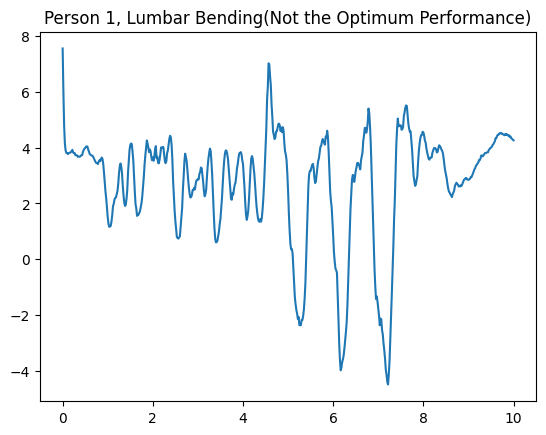

In [179]:
import matplotlib.pyplot as plt

plt.plot(time1, lumbar_bending_1)
plt.title("Person 1, Lumbar Bending(Not the Optimum Performance)")

#### Lumbar Extension Analysis Initial

In [180]:
lumbar_extension_1 = data["lumbar_extension"]
lumbar_extension_1 = [float(i) for i in lumbar_extension_1]
lumbar_extension_1

[-6.34255986,
 -0.50739076,
 1.56076548,
 1.92551963,
 2.12442185,
 1.98335723,
 1.57031801,
 1.33441236,
 0.88069731,
 0.51438154,
 0.08841421,
 -0.26505695,
 -0.60296622,
 -0.87546902,
 -0.96968894,
 -1.26200967,
 -1.26182009,
 -1.65707172,
 -1.65823325,
 -1.81318083,
 -2.1142823,
 -2.12065374,
 -2.19143302,
 -2.28612345,
 -2.80531946,
 -2.87258398,
 -2.87303953,
 -3.28502433,
 -3.5793492,
 -3.56224713,
 -3.63556912,
 -3.72743617,
 -4.07285937,
 -3.79321412,
 -3.95077553,
 -3.777223,
 -3.7272305,
 -3.57417268,
 -3.56961928,
 -3.23286573,
 -2.74598748,
 -2.58573137,
 -2.05614891,
 -1.56539095,
 -1.38804797,
 -0.9587171,
 -0.57232786,
 -0.34312028,
 0.02387103,
 0.34814346,
 0.6578625,
 1.06136278,
 1.41877902,
 1.76726837,
 2.09815308,
 2.31977779,
 2.71299764,
 3.24538348,
 3.5505596,
 4.11815199,
 4.59398031,
 5.0723385,
 5.49321831,
 5.61031511,
 5.81715906,
 5.82507354,
 5.63208903,
 5.54532713,
 5.55541085,
 5.5213792,
 5.40409413,
 5.42456159,
 5.61990405,
 5.79816137,
 6.441448

Text(0.5, 1.0, 'Person 1, Lumbar Extension(Not the Optimum Performance)')

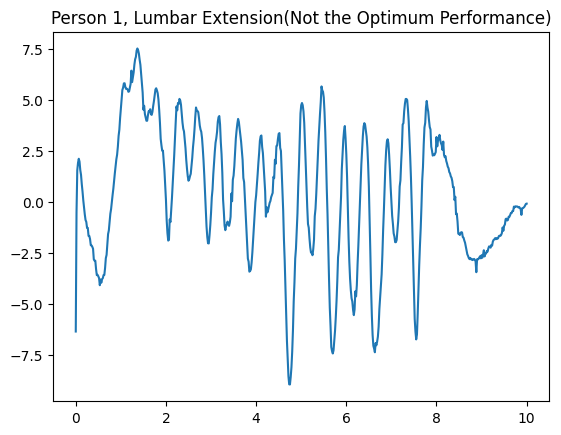

In [181]:
import matplotlib.pyplot as plt

plt.plot(time1, lumbar_extension_1)
plt.title("Person 1, Lumbar Extension(Not the Optimum Performance)")

### The Proper Posture for Running Analysis

In [251]:
data = readKinematicsData("C:/Users/Jatin/Desktop/Engineering/ROBOTICS PROGRAM NUS/PROJECT/OpenCAP/DATA/NUS_PROJECT_DATA/OpenSimData/Kinematics/Jogging_End.mot")

In [252]:
data

{'nRows': '678\n',
 'nColumns': '36\n',
 'inDegrees': 'yes\n',
 'Units': 'Units are S.I. units (second, meters, Newtons, ...)\n',
 'time': ['      0.00000000',
  '      0.01666670',
  '      0.03333330',
  '      0.05000000',
  '      0.06666670',
  '      0.08333330',
  '      0.10000000',
  '      0.11666670',
  '      0.13333330',
  '      0.15000000',
  '      0.16666670',
  '      0.18333330',
  '      0.20000000',
  '      0.21666670',
  '      0.23333330',
  '      0.25000000',
  '      0.26666670',
  '      0.28333330',
  '      0.30000000',
  '      0.31666670',
  '      0.33333330',
  '      0.35000000',
  '      0.36666670',
  '      0.38333330',
  '      0.40000000',
  '      0.41666670',
  '      0.43333330',
  '      0.45000000',
  '      0.46666670',
  '      0.48333330',
  '      0.50000000',
  '      0.51666670',
  '      0.53333330',
  '      0.55000000',
  '      0.56666670',
  '      0.58333330',
  '      0.60000000',
  '      0.61666670',
  '      0.63333330',
  ' 

In [253]:
time2 = data["time"]
time2 = [float(i) for i in time2]
time2

[0.0,
 0.0166667,
 0.0333333,
 0.05,
 0.0666667,
 0.0833333,
 0.1,
 0.1166667,
 0.1333333,
 0.15,
 0.1666667,
 0.1833333,
 0.2,
 0.2166667,
 0.2333333,
 0.25,
 0.2666667,
 0.2833333,
 0.3,
 0.3166667,
 0.3333333,
 0.35,
 0.3666667,
 0.3833333,
 0.4,
 0.4166667,
 0.4333333,
 0.45,
 0.4666667,
 0.4833333,
 0.5,
 0.5166667,
 0.5333333,
 0.55,
 0.5666667,
 0.5833333,
 0.6,
 0.6166667,
 0.6333333,
 0.65,
 0.6666667,
 0.6833333,
 0.7,
 0.7166667,
 0.7333333,
 0.75,
 0.7666667,
 0.7833333,
 0.8,
 0.8166667,
 0.8333333,
 0.85,
 0.8666667,
 0.8833333,
 0.9,
 0.9166667,
 0.9333333,
 0.95,
 0.9666667,
 0.9833333,
 1.0,
 1.0166667,
 1.0333333,
 1.05,
 1.0666667,
 1.0833333,
 1.1,
 1.1166667,
 1.1333333,
 1.15,
 1.1666667,
 1.1833333,
 1.2,
 1.2166667,
 1.2333333,
 1.25,
 1.2666667,
 1.2833333,
 1.3,
 1.3166667,
 1.3333333,
 1.35,
 1.3666667,
 1.3833333,
 1.4,
 1.4166667,
 1.4333333,
 1.45,
 1.4666667,
 1.4833333,
 1.5,
 1.5166667,
 1.5333333,
 1.55,
 1.5666667,
 1.5833333,
 1.6,
 1.6166667,
 1.633

#### Arm Rotation Left

In [254]:
arm_rot_l_2 = data["arm_rot_l"]
arm_rot_l_2 = [float(i) for i in arm_rot_l_2]

Text(0.5, 1.0, 'Arm Rotation Left analysis(Optimum Performance)')

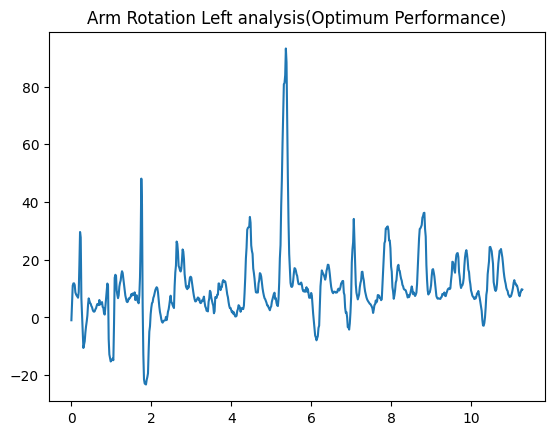

In [255]:
import matplotlib.pyplot as plt

plt.plot(time2, arm_rot_l_2)
plt.title("Arm Rotation Left analysis(Optimum Performance)")

#### Arm Rotation Right

In [256]:
arm_rot_r_2 = data["arm_rot_r"]
arm_rot_r_2 = [float(i) for i in arm_rot_r_2]

Text(0.5, 1.0, 'Arm Rotation R analysis(Optimum Performance)')

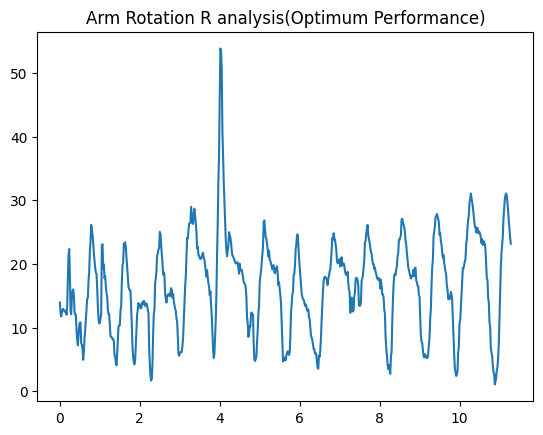

In [257]:
import matplotlib.pyplot as plt

plt.plot(time2, arm_rot_r_2)
plt.title("Arm Rotation R analysis(Optimum Performance)")

#### Arm Flexion Left

In [258]:
arm_flex_l_2 = data["arm_flex_l"]
arm_flex_l_2 = [float(i) for i in arm_flex_l_2]

Text(0.5, 1.0, 'Arm Flexion Left analysis(Optimum Performance)')

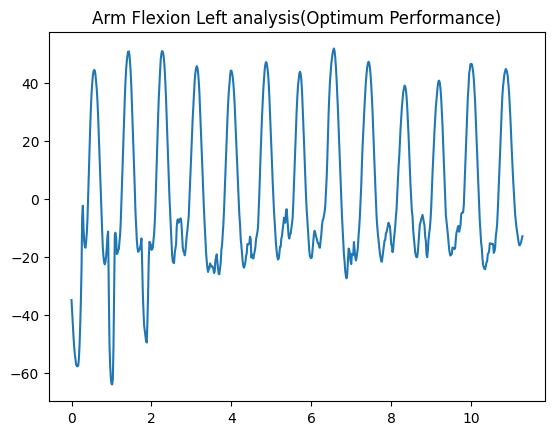

In [259]:
import matplotlib.pyplot as plt

plt.plot(time2, arm_flex_l_2)
plt.title("Arm Flexion Left analysis(Optimum Performance)")

#### Arm Flexion Right

In [260]:
arm_flex_r_2 = data["arm_flex_r"]
arm_flex_r_2 = [float(i) for i in arm_flex_r_2]

Text(0.5, 1.0, 'Arm Flexion Right analysis(Optimum Performance)')

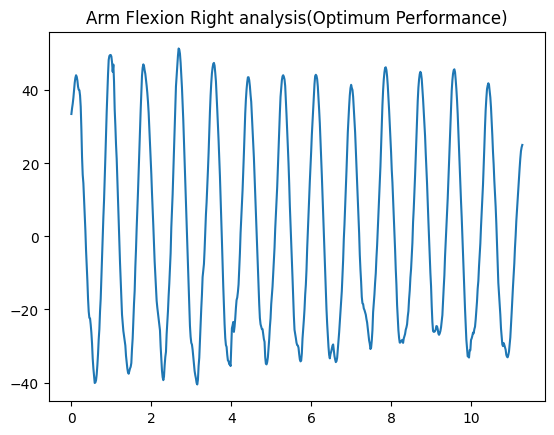

In [261]:
import matplotlib.pyplot as plt

plt.plot(time2, arm_flex_r_2)
plt.title("Arm Flexion Right analysis(Optimum Performance)")

#### Hip Flex Right

In [262]:
hip_flex_2 = data["hip_flexion_r"]
hip_flex_2 = [float(i) for i in hip_flex_2]

In [263]:
hip_flex_2

[10.68207904,
 13.21517351,
 14.77021676,
 15.04573982,
 15.48625894,
 15.77956175,
 15.52788056,
 15.44388774,
 14.67885589,
 14.48979795,
 14.0061625,
 13.57041073,
 13.50472188,
 12.94685708,
 13.02219911,
 13.48715436,
 14.26484568,
 15.82614783,
 18.61737794,
 22.02323256,
 25.25182266,
 29.09622626,
 32.29521967,
 36.53691286,
 40.30824415,
 43.93313448,
 47.58337696,
 50.42404638,
 52.2256151,
 53.49130166,
 54.08020683,
 53.14927529,
 51.75162688,
 49.66405002,
 47.74059943,
 45.79769669,
 43.05806401,
 40.58273477,
 37.48694938,
 34.24632394,
 30.52034423,
 26.30183475,
 22.49466999,
 18.23105447,
 14.99105635,
 12.75185888,
 10.65903399,
 9.15635732,
 8.34603675,
 7.50119334,
 6.70600408,
 6.4135992,
 6.02522271,
 6.3583318,
 6.60706382,
 6.87587492,
 6.8177017,
 6.57267236,
 6.75794642,
 6.66029157,
 6.7008652,
 6.22620885,
 5.47686428,
 5.72748585,
 5.76359816,
 5.52787411,
 5.74913004,
 5.92613461,
 6.7248559,
 7.90766388,
 9.72548611,
 12.28628642,
 16.03007242,
 19.55934

Text(0.5, 1.0, 'Hip Flexion R analysis(Optimum Performance)')

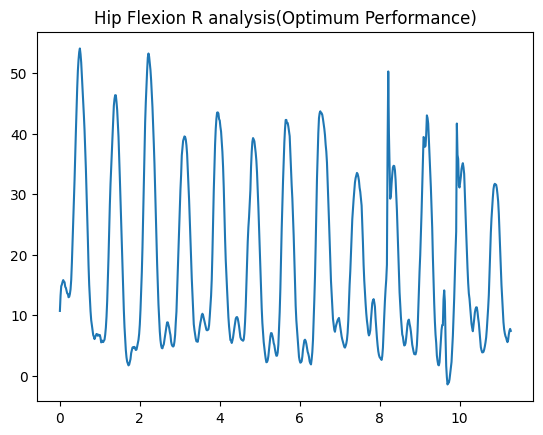

In [264]:
import matplotlib.pyplot as plt

plt.plot(time2, hip_flex_2)
plt.title("Hip Flexion R analysis(Optimum Performance)")

#### Hip Flexion L Analysis(Optimum Performance)

In [145]:
hip_flex_2_l = data["hip_flexion_l"]
hip_flex_2_l = [float(i) for i in hip_flex_2_l]

In [146]:
hip_flex_2_l

[30.70545997,
 32.86608642,
 35.11301406,
 36.00847956,
 37.17807259,
 38.38675794,
 38.71840743,
 38.9575759,
 38.08135035,
 37.75709269,
 36.80332484,
 35.68285689,
 34.7459818,
 32.83500525,
 30.91943027,
 28.7023394,
 26.15740731,
 23.45576443,
 21.6410934,
 19.97791136,
 18.22359134,
 17.27665478,
 15.31715232,
 14.82301955,
 14.51714885,
 15.03432104,
 16.50654394,
 17.70781177,
 18.03644022,
 18.29923725,
 18.39010621,
 16.95889738,
 16.09818651,
 14.5540921,
 13.39360423,
 12.30854165,
 11.29042441,
 10.98022867,
 10.48384576,
 10.42893707,
 10.37817266,
 10.29634766,
 10.74966638,
 11.35585918,
 12.78462225,
 15.38446157,
 18.77080652,
 22.72785095,
 27.24198354,
 31.21767157,
 34.36377443,
 37.25753042,
 39.14632497,
 41.13610741,
 42.75229037,
 43.96740255,
 43.87942007,
 43.77779228,
 43.48189222,
 43.07317745,
 42.67759821,
 41.6826292,
 40.08850577,
 39.02158615,
 37.52022697,
 35.76727913,
 33.74685987,
 31.31859757,
 29.3952859,
 26.80906823,
 24.21206672,
 21.40901379,

Text(0.5, 1.0, 'Hip Flexion L analysis(Optimum Performance)')

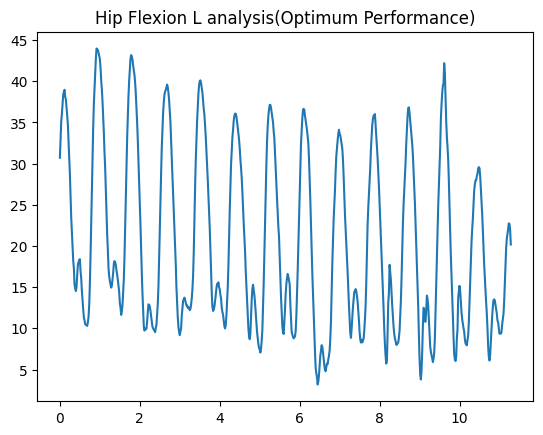

In [147]:
import matplotlib.pyplot as plt

plt.plot(time2, hip_flex_2_l)
plt.title("Hip Flexion L analysis(Optimum Performance)")

#### Knee Angle R Analysis(Optimum Performance)

In [148]:
knee_angle_r_2 = data["knee_angle_r"]
knee_angle_r_2 = [float(i) for i in knee_angle_r_2]
knee_angle_r_2

[34.18372411,
 37.06827911,
 38.09272903,
 38.45168918,
 38.90720398,
 38.6445881,
 37.73905916,
 36.7888859,
 34.536244,
 33.02988639,
 30.6467699,
 28.55617273,
 26.62463617,
 24.19172662,
 23.49985188,
 23.97916383,
 25.82531765,
 29.11777992,
 34.82113515,
 42.03946388,
 49.78567851,
 58.73972642,
 67.65849006,
 77.29655673,
 86.88931806,
 94.60839119,
 101.03309615,
 105.49599928,
 108.39957452,
 110.8334582,
 112.24454523,
 112.68133083,
 111.43862958,
 109.12496494,
 105.92668584,
 101.87696603,
 96.58176293,
 90.31816382,
 82.92942045,
 74.89383062,
 66.79315934,
 58.67388931,
 51.6875208,
 44.11086603,
 38.52747197,
 34.0476034,
 29.72694807,
 26.72589692,
 24.93214062,
 23.93157393,
 23.63775421,
 23.97487646,
 24.93315586,
 26.93760718,
 29.03132709,
 31.02722356,
 32.66494531,
 33.9670954,
 34.71198547,
 34.60848413,
 34.08941979,
 32.20465925,
 29.49307206,
 26.53071589,
 23.11192892,
 21.38094961,
 20.79753292,
 20.3586034,
 20.38224313,
 22.36886061,
 26.58346649,
 33.49

Text(0.5, 1.0, 'Hip Flexion R analysis(Optimum Performance)')

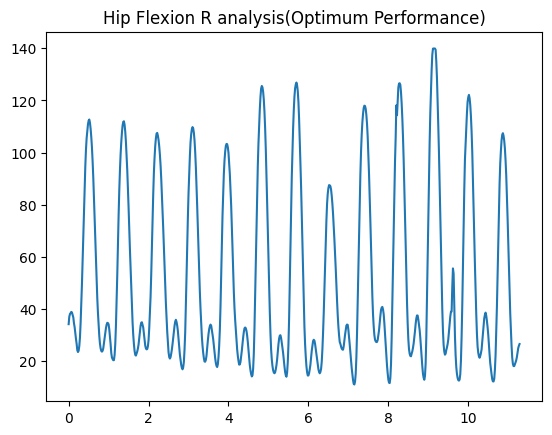

In [149]:
import matplotlib.pyplot as plt

plt.plot(time2, knee_angle_r_2)
plt.title("Hip Flexion R analysis(Optimum Performance)")

#### Knee Angle L Analysis(Optimum Performance)

In [150]:
knee_angle_l_2 = data["knee_angle_l"]
knee_angle_l_2 = [float(i) for i in knee_angle_l_2]
knee_angle_l_2

[65.86773873,
 66.29836991,
 67.14435901,
 68.5259314,
 69.62665705,
 70.1368597,
 69.43348019,
 68.07093267,
 65.28631446,
 62.8161305,
 58.88295965,
 54.69516129,
 50.37917724,
 45.34419393,
 41.00636994,
 37.48805335,
 34.38420272,
 31.36525378,
 29.89549765,
 28.8894708,
 28.34557249,
 29.03633266,
 28.83509262,
 30.17536276,
 32.18125739,
 34.4437715,
 37.312613,
 39.40451384,
 40.30949009,
 40.95580952,
 41.20272617,
 40.37069326,
 39.54331763,
 37.86246678,
 36.0510392,
 33.42134385,
 30.60622706,
 28.21946594,
 25.40472798,
 23.03984012,
 21.59752039,
 20.68214092,
 20.94931233,
 21.68942729,
 23.86097882,
 27.47859804,
 32.00583696,
 37.70376373,
 44.04690299,
 50.43095435,
 56.21277339,
 61.88869522,
 66.65274678,
 71.54932743,
 76.04372785,
 79.58370219,
 81.01972083,
 81.95962007,
 81.03715672,
 79.61756942,
 77.2541805,
 73.38001796,
 68.34144992,
 62.54890295,
 55.7935106,
 49.25091917,
 43.58860321,
 38.43620914,
 34.92634185,
 31.43383079,
 29.0104252,
 26.9481256,
 25.

Text(0.5, 1.0, 'Hip Flexion L analysis(Optimum Performance)')

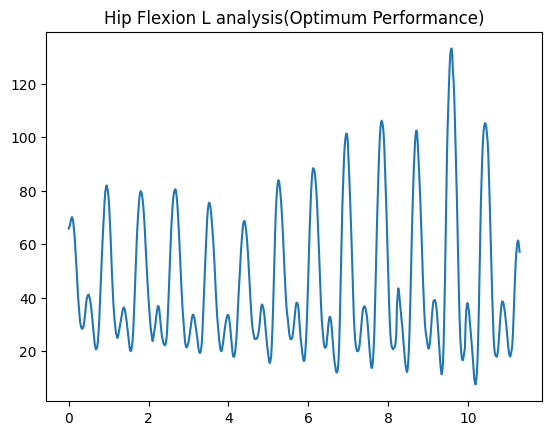

In [151]:
import matplotlib.pyplot as plt

plt.plot(time2, knee_angle_l_2)
plt.title("Hip Flexion L analysis(Optimum Performance)")

#### Ankle Angle L

In [152]:
ankle_angle_l_2 = data["ankle_angle_l"]
ankle_angle_l_2 = [float(i) for i in ankle_angle_l_2]
ankle_angle_l_2

[3.7403874,
 5.49464325,
 6.67071539,
 8.25684678,
 9.22795235,
 9.3516344,
 8.24807488,
 7.09867448,
 4.87313824,
 3.90715557,
 1.99617961,
 0.52903665,
 -0.55604992,
 -2.74642987,
 -4.27075609,
 -5.35598934,
 -5.72918794,
 -4.31680515,
 -1.32090362,
 1.87539386,
 5.08622971,
 8.59442612,
 11.42326637,
 14.68942941,
 17.97227965,
 20.18446625,
 21.04130513,
 20.36404928,
 19.37201669,
 18.7122759,
 18.22832443,
 17.94333755,
 17.12570558,
 16.06833963,
 14.66609369,
 12.8425813,
 10.37415197,
 7.98193318,
 5.63925401,
 2.96311578,
 0.6574317,
 -1.65893967,
 -3.38663794,
 -5.56356204,
 -6.64790983,
 -7.2099349,
 -8.51081987,
 -8.52992082,
 -8.45866423,
 -7.44779757,
 -5.87964072,
 -3.82691774,
 -1.23941247,
 1.45623145,
 3.83234797,
 5.76135902,
 6.21637798,
 7.15606422,
 7.67364414,
 7.94503069,
 7.13598228,
 5.44764869,
 3.01655034,
 -0.14810712,
 -4.22760427,
 -8.48134282,
 -11.61077986,
 -14.89704733,
 -15.65678131,
 -14.31858126,
 -11.07862482,
 -7.25004695,
 -2.72804732,
 1.29557

Text(0.5, 1.0, 'Ankle Angle L analysis(Optimum Performance)')

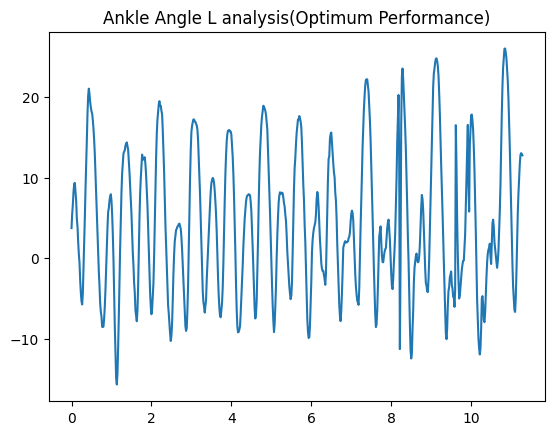

In [153]:
import matplotlib.pyplot as plt

plt.plot(time2, ankle_angle_l_2)
plt.title("Ankle Angle L analysis(Optimum Performance)")

#### Ankle Angle R

In [154]:
ankle_angle_r_2 = data["ankle_angle_r"]
ankle_angle_r_2 = [float(i) for i in ankle_angle_r_2]
ankle_angle_r_2

[10.29561174,
 15.64596963,
 17.82469356,
 20.08189758,
 21.25058307,
 22.03661018,
 21.65262366,
 21.21511583,
 19.38720519,
 18.78204039,
 16.47114323,
 14.59644594,
 12.90341169,
 10.54746564,
 8.61255265,
 6.13083002,
 4.13255241,
 2.17238649,
 1.32235092,
 0.61767121,
 -0.05927494,
 1.00226539,
 2.0563032,
 2.99268625,
 3.64684073,
 2.90372863,
 1.70924498,
 -0.19201567,
 -2.50621449,
 -3.30887628,
 -3.71303919,
 -4.53471136,
 -4.50295498,
 -5.60120556,
 -6.61896136,
 -7.20622308,
 -7.96911933,
 -8.53353054,
 -9.00126378,
 -9.14170038,
 -8.96744026,
 -9.61763509,
 -9.76620189,
 -9.99552404,
 -9.91043821,
 -8.1915845,
 -5.66020325,
 -1.68588779,
 2.34265845,
 6.38612597,
 9.38197694,
 11.5511893,
 13.76398891,
 15.60719507,
 17.77513326,
 19.41887608,
 20.29284434,
 21.17232729,
 20.74034399,
 20.64718867,
 20.16899705,
 19.14283643,
 17.28190551,
 14.64107829,
 11.7515206,
 9.3683304,
 7.53945428,
 5.26767988,
 3.73678699,
 2.6775949,
 -0.19396433,
 -2.74201041,
 -6.68199795,
 -9.

Text(0.5, 1.0, 'Ankle Angle R analysis(Optimum Performance)')

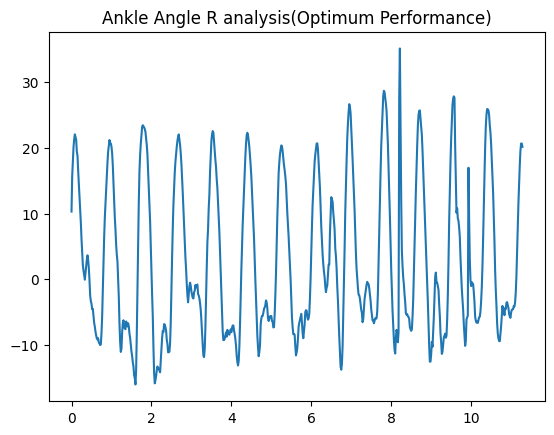

In [155]:
import matplotlib.pyplot as plt

plt.plot(time2, ankle_angle_r_2)
plt.title("Ankle Angle R analysis(Optimum Performance)")

#### Lumbar Bending Final Analysis

In [186]:
lumbar_bending_2 = data["lumbar_bending"]
lumbar_bending_2 = [float(i) for i in lumbar_bending_2]
lumbar_bending_2

[0.81754986,
 1.43144893,
 0.91684198,
 0.52027697,
 0.56193853,
 0.44083235,
 0.2574963,
 0.01862471,
 -0.25467156,
 -0.14910057,
 -0.35881167,
 -0.03580517,
 0.99912917,
 2.23239591,
 3.49729097,
 3.24603593,
 3.06523288,
 3.33935472,
 4.2855292,
 5.08081883,
 5.77769342,
 5.91733222,
 5.9374585,
 5.64328021,
 4.94961535,
 4.52725069,
 3.81779418,
 3.06547782,
 2.56090435,
 2.16701953,
 1.82567319,
 1.68284345,
 1.74087487,
 1.5568379,
 1.12139477,
 0.85924206,
 0.65050016,
 0.50468516,
 0.46548396,
 1.01565341,
 1.64088137,
 2.35610731,
 2.2730005,
 1.80488898,
 0.7518103,
 -0.65665258,
 -2.00433045,
 -3.43594272,
 -4.34834481,
 -5.08633928,
 -5.51710022,
 -5.50670583,
 -5.05868003,
 -4.38304604,
 -3.86112013,
 -3.24351642,
 -4.2477424,
 -5.27908564,
 -5.67156304,
 -5.51896595,
 -5.1265932,
 -4.87048145,
 -4.96500015,
 -2.18556944,
 -0.18970294,
 0.09749233,
 0.09032884,
 0.07298233,
 -0.60558655,
 -0.03113232,
 1.38260061,
 3.18996803,
 4.96834797,
 6.53555666,
 7.46881944,
 7.5909

Text(0.5, 1.0, 'Lumbar Bending analysis(Optimum Performance)')

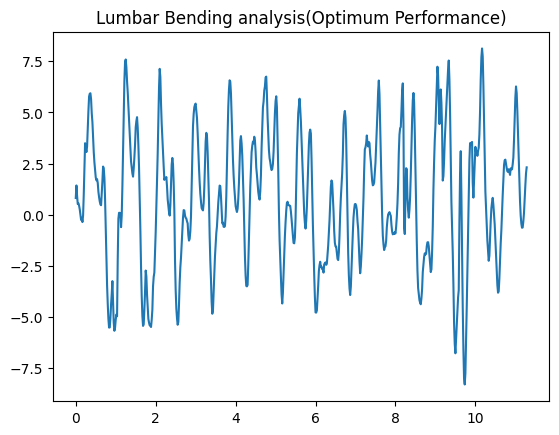

In [187]:
import matplotlib.pyplot as plt

plt.plot(time2, lumbar_bending_2)
plt.title("Lumbar Bending analysis(Optimum Performance)")

#### Lumbar Extension Final Analysis

In [188]:
lumbar_extension_2 = data["lumbar_extension"]
lumbar_extension_2 = [float(i) for i in lumbar_extension_2]
lumbar_extension_2

[-20.99192748,
 -18.9215755,
 -16.23955514,
 -15.62514648,
 -14.7946623,
 -14.48629653,
 -14.50878818,
 -14.05475479,
 -13.95243676,
 -13.01052527,
 -12.48441869,
 -12.38824805,
 -12.22927909,
 -11.82819716,
 -10.70500444,
 -9.66336249,
 -9.16722916,
 -9.55221787,
 -10.14917293,
 -10.6550964,
 -11.21784263,
 -11.81615286,
 -13.0497949,
 -13.93963764,
 -14.51949512,
 -15.52223902,
 -16.83573836,
 -18.60918699,
 -20.67347029,
 -22.05352109,
 -22.42308558,
 -23.35640824,
 -23.38907639,
 -23.03327204,
 -22.22784815,
 -21.03957711,
 -19.82174516,
 -18.12867135,
 -16.73588055,
 -15.5754112,
 -14.69078527,
 -13.65958485,
 -12.5849405,
 -11.47513947,
 -10.50247761,
 -9.72975234,
 -9.02239843,
 -8.81413696,
 -8.93609624,
 -9.88426389,
 -11.49302718,
 -13.81252756,
 -16.31923245,
 -18.47620255,
 -19.87175758,
 -20.6520013,
 -22.20593528,
 -22.23875276,
 -22.09048817,
 -21.68601185,
 -20.86441688,
 -19.50707239,
 -17.96766735,
 -18.19767513,
 -14.98078993,
 -12.03851563,
 -11.0433459,
 -9.9075912

Text(0.5, 1.0, 'Lumbar Extension analysis(Optimum Performance)')

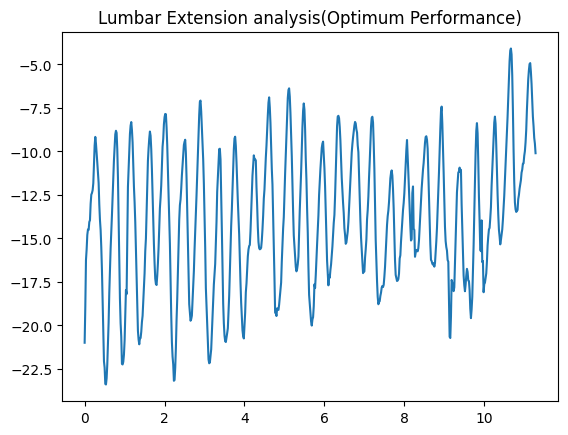

In [189]:
import matplotlib.pyplot as plt

plt.plot(time2, lumbar_extension_2)
plt.title("Lumbar Extension analysis(Optimum Performance)")

### Plotting Both Together for Analysis

### Arm Flexion

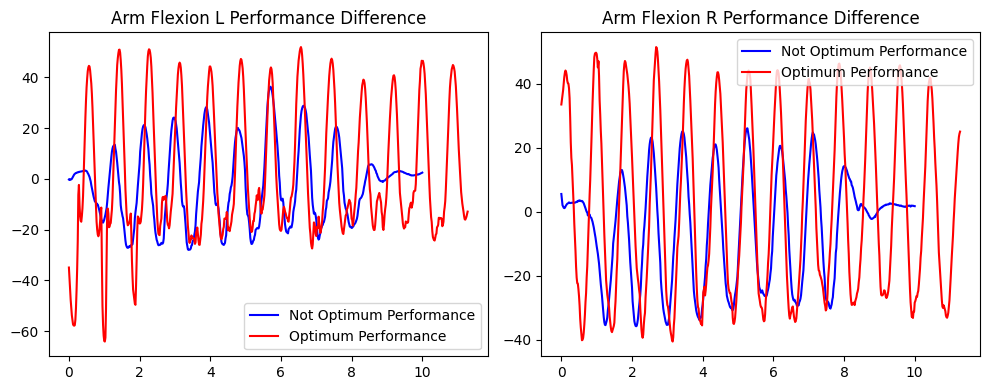

In [215]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, arm_flex_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, arm_flex_l_2, label='Optimum Performance', color='red')
ax1.set_title("Arm Flexion L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, arm_flex_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, arm_flex_r_2, label='Optimum Performance', color='red')
ax2.set_title('Arm Flexion R Performance Difference')

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Arm Rotation

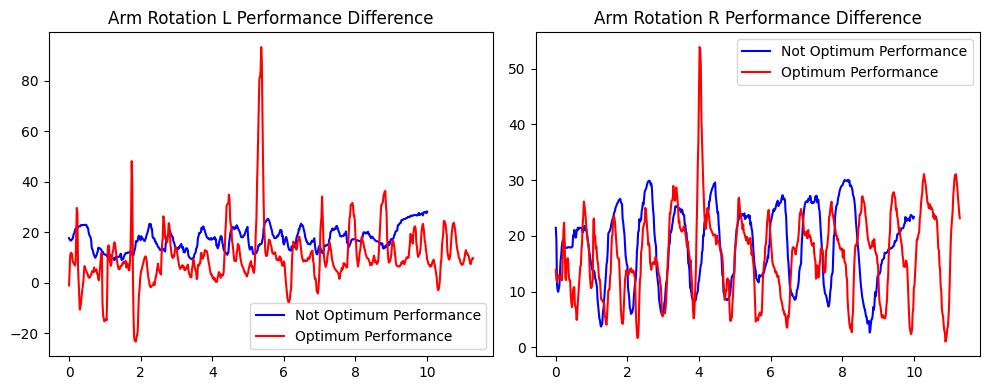

In [265]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, arm_rot_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, arm_rot_l_2, label='Optimum Performance', color='red')
ax1.set_title("Arm Rotation L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, arm_rot_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, arm_rot_r_2, label='Optimum Performance', color='red')
ax2.set_title('Arm Rotation R Performance Difference')

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Hip Flexion

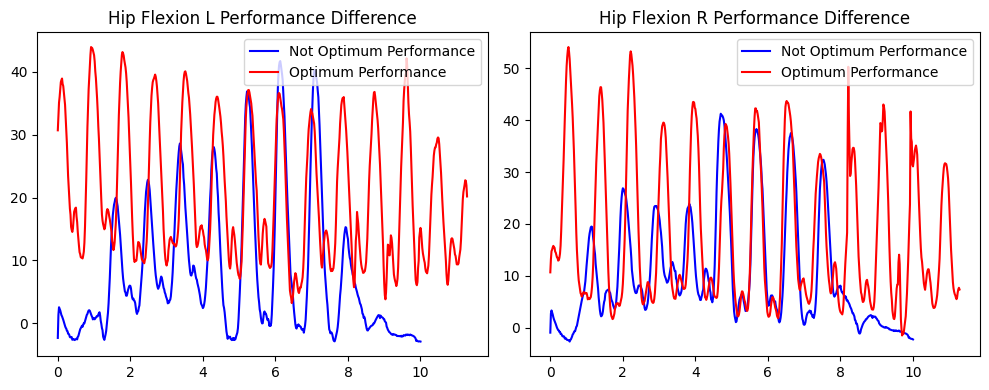

In [193]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, hip_flex_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, hip_flex_2_l, label='Optimum Performance', color='red')
ax1.set_title("Hip Flexion L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, hip_flex_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, hip_flex_2, label='Optimum Performance', color='red')
ax2.set_title('Hip Flexion R Performance Difference')

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Knee Angle

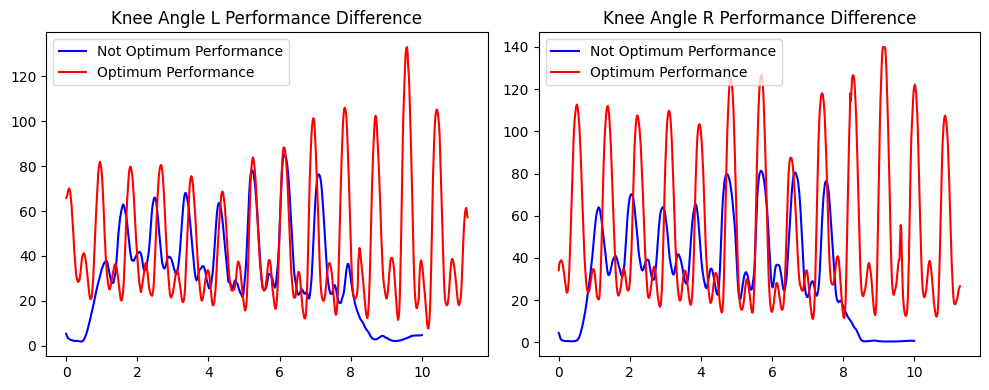

In [196]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, knee_angle_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, knee_angle_l_2, label='Optimum Performance', color='red')
ax1.set_title("Knee Angle L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, knee_angle_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, knee_angle_r_2, label='Optimum Performance', color='red')
ax2.set_title("Knee Angle R Performance Difference")

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Ankle Angle 

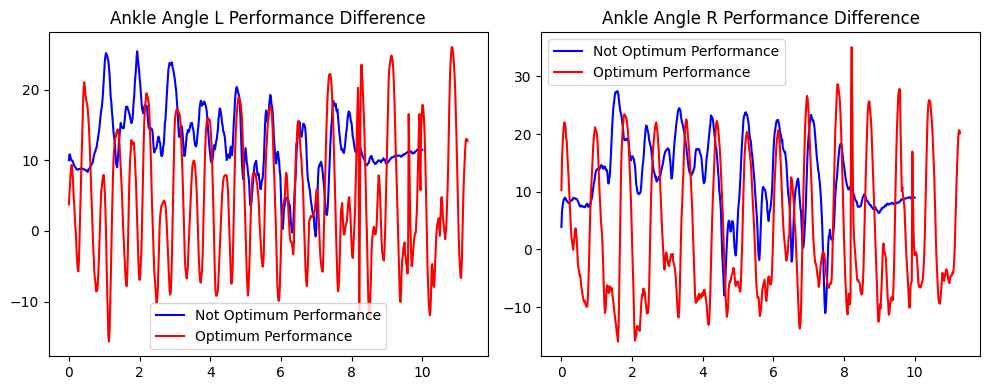

In [197]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, ankle_angle_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, ankle_angle_l_2, label='Optimum Performance', color='red')
ax1.set_title("Ankle Angle L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, ankle_angle_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, ankle_angle_r_2, label='Optimum Performance', color='red')
ax2.set_title("Ankle Angle R Performance Difference")

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Lumbar Bending and Extension

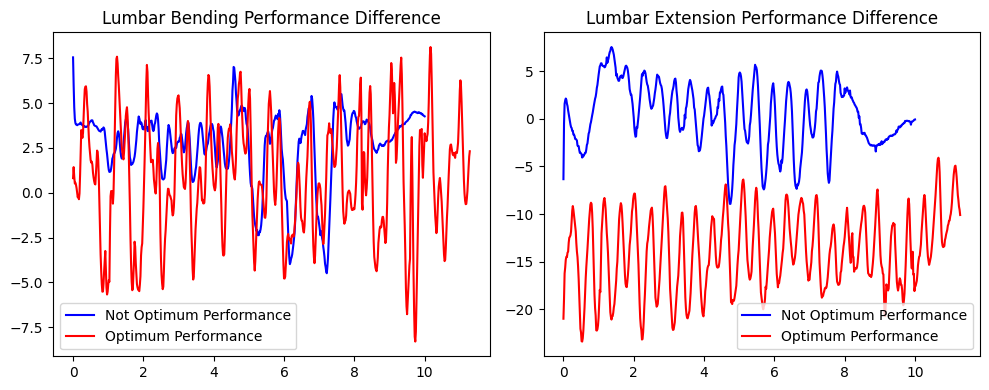

In [198]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, lumbar_bending_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, lumbar_bending_2, label='Optimum Performance', color='red')
ax1.set_title("Lumbar Bending Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, lumbar_extension_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, lumbar_extension_2, label='Optimum Performance', color='red')
ax2.set_title("Lumbar Extension Performance Difference")

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()